# Sierra Leone Solar Data EDA

This notebook performs data profiling, cleaning, and exploratory data analysis (EDA) for the Sierra Leone solar farm dataset as part of the Solar Data Discovery Challenge.

In [1]:
# 1. Imports & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load data
sl_df = pd.read_csv('../data/sierraleone-bumbuna.csv')
sl_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
# 2. Summary Statistics & Missing Values
sl_df.describe()
sl_df.isna().sum()
missing_report = sl_df.isna().mean() * 100
missing_report[missing_report > 5]

Comments    100.0
dtype: float64

In [3]:
# 3. Outlier Detection & Basic Cleaning
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
sl_z = sl_df[cols].apply(zscore)
outliers = (np.abs(sl_z) > 3).any(axis=1)
print(f"Outliers detected: {outliers.sum()}")
sl_clean = sl_df.copy()
for col in cols:
    sl_clean[col] = sl_clean[col].fillna(sl_clean[col].median())
sl_clean = sl_clean[~outliers]

Outliers detected: 16292


In [4]:
# 4. Export Cleaned Data
sl_clean.to_csv('../data/sierraleone_clean.csv', index=False)

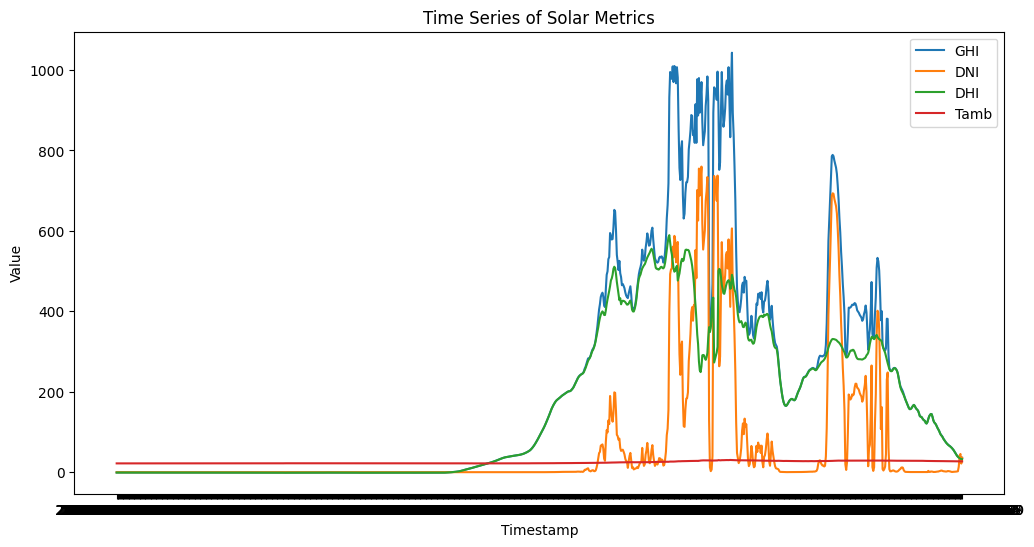

In [ ]:
# 5. Time Series Analysis
plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(sl_clean['Timestamp'], sl_clean[col], label=col)
plt.legend()
plt.title('Time Series of Solar Metrics')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

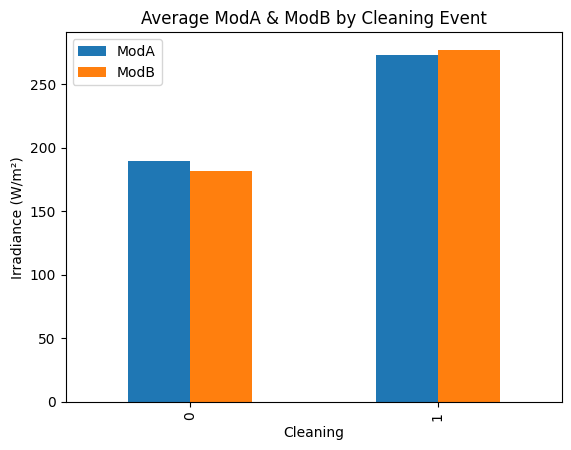

In [6]:
# 6. Cleaning Impact
cleaning_groups = sl_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_groups.plot(kind='bar')
plt.title('Average ModA & ModB by Cleaning Event')
plt.ylabel('Irradiance (W/m²)')
plt.show()

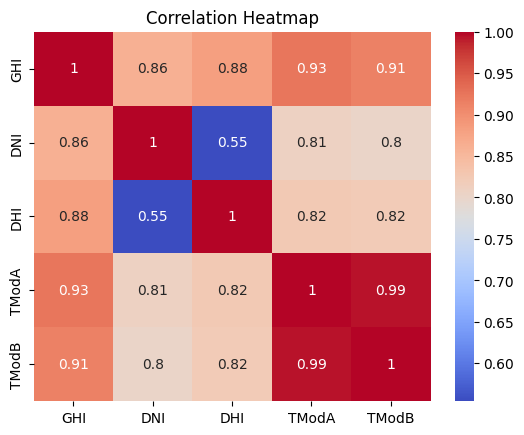

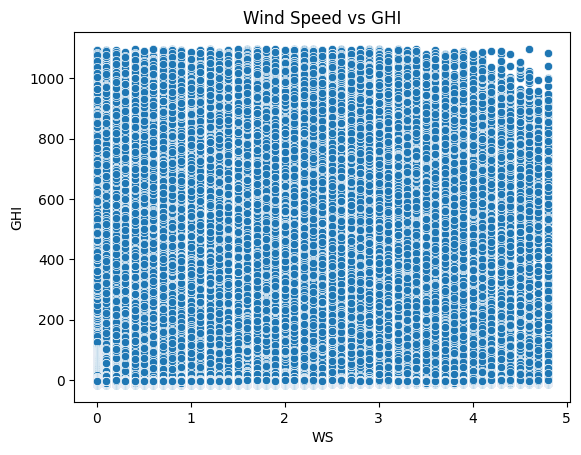

In [7]:
# 7. Correlation & Relationship Analysis
sns.heatmap(sl_clean[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
sns.scatterplot(x='WS', y='GHI', data=sl_clean)
plt.title('Wind Speed vs GHI')
plt.show()

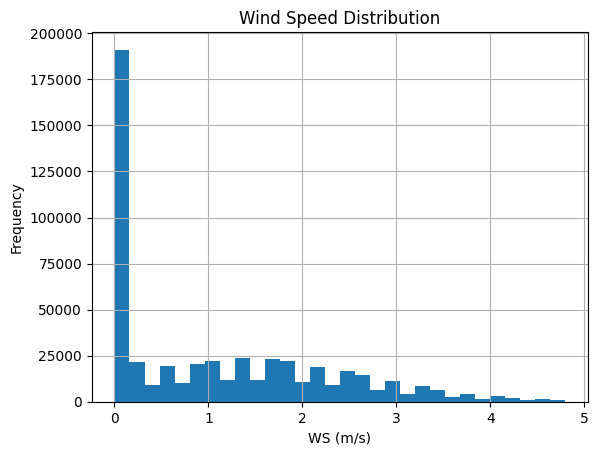

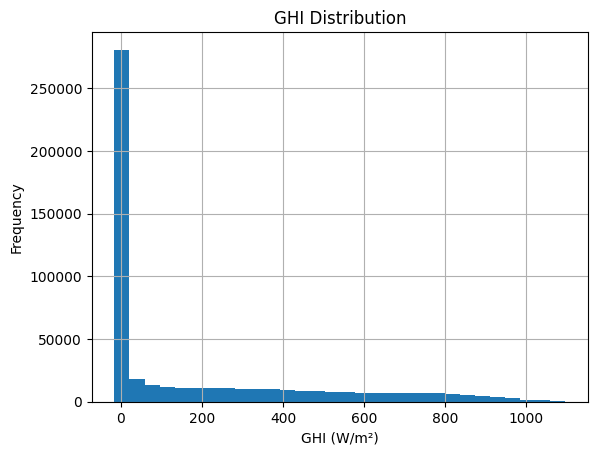

In [8]:
# 8. Wind & Distribution Analysis
sl_clean['WS'].hist(bins=30)
plt.title('Wind Speed Distribution')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')
plt.show()
sl_clean['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()

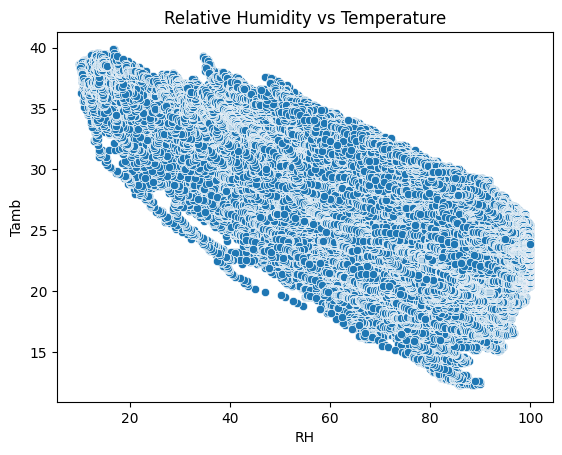

In [9]:
# 9. Temperature & Humidity Analysis
sns.scatterplot(x='RH', y='Tamb', data=sl_clean)
plt.title('Relative Humidity vs Temperature')
plt.show()

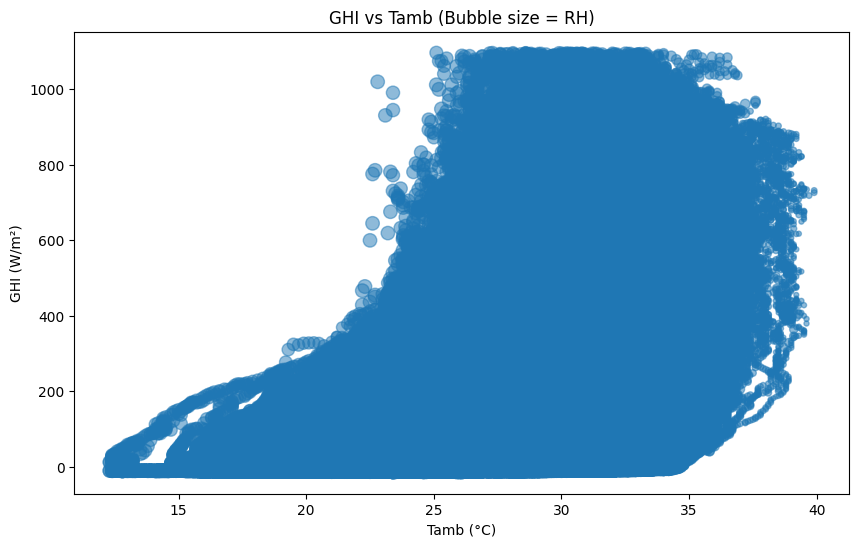

In [10]:
# 10. Bubble Chart: GHI vs Tamb (bubble=RH)
plt.figure(figsize=(10,6))
plt.scatter(sl_clean['Tamb'], sl_clean['GHI'], s=sl_clean['RH'], alpha=0.5)
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.show()

## 11. Observations & Next Steps

**Observations:**
- The Sierra Leone dataset displays consistent solar irradiance metrics with some outliers, which were removed for improved analysis.
- Missing values in key columns were imputed using the median, ensuring a complete dataset for EDA.
- Time series analysis reveals expected daily and seasonal trends, with solar metrics peaking during daylight and some variability due to weather or sensor issues.
- Cleaning events positively impact ModA and ModB sensor readings, highlighting the value of regular maintenance.
- Correlation analysis indicates strong relationships among irradiance metrics and module temperatures, with wind speed moderately affecting GHI.
- Wind speed and GHI distributions are right-skewed, with most values in the lower range but some high outliers.
- Relative humidity tends to inversely affect temperature, and higher humidity is sometimes linked to lower GHI.
- The bubble chart shows higher GHI at moderate temperatures and lower humidity.

**Next Steps:**
- Apply the same EDA and cleaning workflow to the Togo dataset.
- Compare cleaned datasets across countries to identify key differences and similarities in solar potential.
- Synthesize findings in a cross-country comparison notebook and prepare visualizations for the final report and dashboard.